<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import pygimli as pg
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import os
from os import system
import numpy as np

In [123]:
def callTriangle(filename,
                 quality=33, 
                 triangle='triangle',
                 verbose=True):
    
    filebody = filename.replace('.poly', '')

    syscal = triangle + ' -Dpq' + str(quality)
    syscal += 'Aa ' + filebody + '.poly'
 
    if verbose:
        print(syscal)

    system(syscal)

In [296]:
world = mt.createWorld(start=[-200, -200], 
                       end=[200, 200], 
                       layers=[0, 0.5, 2, 25], 
                       area=[0, 0, 0, 0.01, 0],
                       marker=[1, 2, 3, 4, 5],
                       worldMarker=False)

In [297]:
box = mt.createRectangle(start=[-6, 0.5], end=[2, 4], marker=6, area=0.05)

triangle = mt.createPolygon([
    [2, 2], [4, 2], [2, 4]], isClosed=True, marker=7, area=0.05)

box2 = mt.createRectangle(start=[-6, 2], end=[2, 4], marker=8, area=0.05)

prism2 = mt.createPolygon([
    [2, 0.5], [2, 2], [4, 2], [5, 1], [5, 0.5]], isClosed=True, marker=9, area=0.05)


prism3 = mt.createPolygon([
    [5, 0.5], [5, 1], [200, 1], [200, 0.5]], isClosed=True, marker=10, area=0)

prism4 = mt.createPolygon([
    [5, 1], [4, 2], [200, 2], [200, 1]], isClosed=True, marker=11, area=0)

In [298]:
geom = world + box + triangle + box2 + prism2 + prism3 + prism4

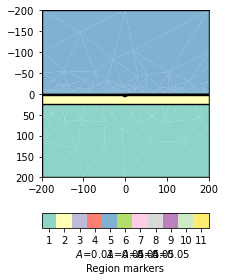

In [299]:
ax, _ = pg.show(geom, 
                showNodes=False, 
                boundaryMarker=False)
ax.set_ylim(ax.get_ylim()[::-1]);

In [300]:
mt.exportPLC(geom,
             '../meshes/commemi2d4.poly', 
             float_format='.7e')

In [301]:
callTriangle('../meshes/commemi2d4.poly', 
             quality=34.2,
             verbose=False)

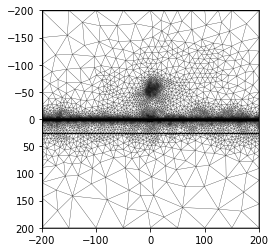

In [275]:
mesh = mt.createMesh(geom, quality=34.2)
ax, _ = pg.show(mesh)
ax.set_ylim(ax.get_ylim()[::-1]);